# Step 1: Installation and Setup

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle

In [4]:
!pip install kaggle


In [5]:
import os

# Set your Kaggle API key
os.environ['KAGGLE_USERNAME'] = 'yaseerarafatkhan'
os.environ['KAGGLE_KEY'] = '654b00fffeca3dc6ae9709d7e7ecfa53'

In [6]:
# Downloading The Dataset
!kaggle datasets download -d tongpython/cat-and-dog

cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile

with zipfile.ZipFile('cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/Users/yaseerarafatkhan/Downloads/Machine Learning & Deep Learning Projects for Beginners 2023/DEEP LEARNING Projects/14)Binary Image Classification with CNN')


# Step 3: Building the Model

In [8]:
# Creating an object (Initilizing CNN)
model = tf.keras.models.Sequential()

In [9]:
# Adding first CCN layer
# 1) filters (kernel/feature detectors) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [10]:
# Adding maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [11]:
# adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [12]:
# Adding Flattening layer
model.add(tf.keras.layers.Flatten())

In [13]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [14]:
# Adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [15]:
# Adding output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
# Compiling the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Fitting CNN to images

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
training_data_dir = "training_set/training_set"
test_data_dir = "test_set/test_set"

In [20]:
#rescale images
datagen = ImageDataGenerator(rescale=1./255)

In [21]:
training_set =datagen.flow_from_directory(directory=training_data_dir,target_size=(32,32),classes=["dogs","cats"],
                                          class_mode ="binary",batch_size=20)

Found 8005 images belonging to 2 classes.


In [22]:
test_set =datagen.flow_from_directory(directory=test_data_dir,target_size=(32,32),classes=["dogs","cats"],
                                          class_mode ="binary",batch_size=20)

Found 2023 images belonging to 2 classes.


In [24]:
len(training_set)*20,len(test_set)*20

(8020, 2040)

In [25]:
test_set.batch_size

20

In [26]:
history= model.fit_generator(generator=training_set,steps_per_epoch=401,epochs=20,validation_data=test_set,validation_steps=102)

/var/folders/1p/lzvh8nn53hd76nt7l85mqcqh0000gn/T/ipykernel_50165/1113202967.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(generator=training_set,steps_per_epoch=401,epochs=20,validation_data=test_set,validation_steps=102)


Epoch 1/20
401/401 [==============================] - 22s 53ms/step - loss: 0.6711 - accuracy: 0.5774 - val_loss: 0.6067 - val_accuracy: 0.6896
Epoch 2/20
401/401 [==============================] - 22s 55ms/step - loss: 0.5986 - accuracy: 0.6771 - val_loss: 0.5686 - val_accuracy: 0.7069
Epoch 3/20
401/401 [==============================] - 22s 55ms/step - loss: 0.5618 - accuracy: 0.7088 - val_loss: 0.6062 - val_accuracy: 0.6683
Epoch 4/20
401/401 [==============================] - 22s 55ms/step - loss: 0.5366 - accuracy: 0.7310 - val_loss: 0.5291 - val_accuracy: 0.7415
Epoch 5/20
401/401 [==============================] - 22s 56ms/step - loss: 0.4983 - accuracy: 0.7505 - val_loss: 0.5305 - val_accuracy: 0.7464
Epoch 6/20
401/401 [==============================] - 21s 53ms/step - loss: 0.4683 - accuracy: 0.7800 - val_loss: 0.5179 - val_accuracy: 0.7543
Epoch 7/20
401/401 [==============================] - 21s 53ms/step - loss: 0.4364 - accuracy: 0.7941 - val_loss: 0.5573 - val_accuracy:

# Step 5: Plotting the learning curve

In [37]:
def learning_curve(history,epoch):
    #training vs validation accuracy
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history["accuracy"])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"],loc ="upper left")
    plt.grid(True) 
    plt.show()
    
    #training vs validation loss
    plt.plot(epoch_range,history.history["loss"])
    plt.plot(epoch_range,history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.grid(True) 
    plt.show()

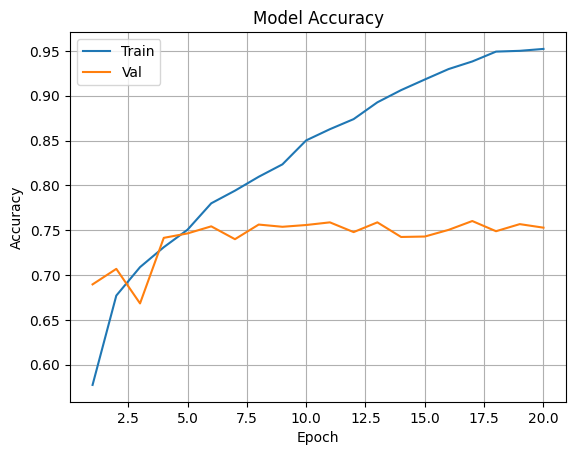

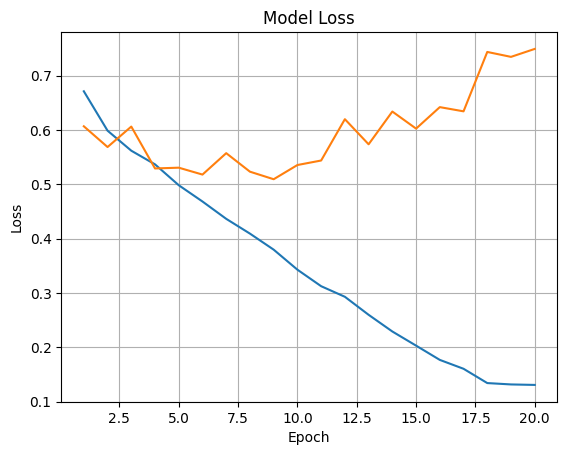

In [39]:
learning_curve(history,20)